##  DATA PRE-PROCESSING

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
dataset = pd.read_csv("C:/Users/ANITA/Documents/GitHub/project-prediksi-harga-properti/property_data.csv")
dataset.head()

,price,buildingSize,landSize,bedRooms,bathRooms,garages,z,province,city,district,latitude,longitude
0,850000000,100,50,3.0,2,0,1.324517,Jawa Timur,Surabaya,Tambaksari,NaN,NaN
1,1700000000,110,103,3.0,2,0,0.586065,Banten,Tangerang Selatan,NaN,NaN,NaN
2,3500000000,201,113,3.0,4,1,0.929438,Jakarta,Jakarta Timur,Matraman,NaN,NaN
3,38000000000,600,1028,5.0,4,4,2.932825,Jakarta,Jakarta Pusat,Kemayoran,NaN,NaN
4,1800000000,150,180,3.0,2,0,0.586065,Jawa Timur,Sidoarjo,Sidoarjo,NaN,NaN


In [13]:
prov = dataset[dataset['province'] == 'Banten']
prov

,price,buildingSize,landSize,bedRooms,bathRooms,garages,z,province,city,district,latitude,longitude
1,1700000000,110,103,3.0,2,0,0.586065,Banten,Tangerang Selatan,NaN,NaN,NaN
6,1300000000,70,102,2.0,1,0,1.166187,Banten,Tangerang Selatan,BSD City,NaN,NaN
18,1500000000,60,64,2.0,2,0,1.030467,Banten,Tangerang Selatan,Ciputat Timur,NaN,NaN
29,800000000,180,125,3.0,2,0,0.701865,Banten,Tangerang,Karawaci,NaN,NaN
35,1500000000,130,90,3.0,2,0,0.622571,Banten,Tangerang Selatan,Pondok Aren,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
594633,3500000000,139,120,4.0,3,0,0.586065,Banten,Tangerang Selatan,Pondok Aren,-6.273348,106.709877
594634,2500000000,160,120,3.0,2,0,0.586065,Banten,Tangerang Selatan,Pondok Aren,-6.286510,106.698732
594636,2935500000,145,123,4.0,3,0,0.586065,Banten,Tangerang Selatan,Ciputat,-6.291165,106.718879
594641,280000000,30,60,2.0,1,0,1.575223,Banten,Tangerang,Jambe,-6.337467,106.493974


In [14]:
data = prov.iloc[:50000]
data

,price,buildingSize,landSize,bedRooms,bathRooms,garages,z,province,city,district,latitude,longitude
1,1700000000,110,103,3.0,2,0,0.586065,Banten,Tangerang Selatan,NaN,NaN,NaN
6,1300000000,70,102,2.0,1,0,1.166187,Banten,Tangerang Selatan,BSD City,NaN,NaN
18,1500000000,60,64,2.0,2,0,1.030467,Banten,Tangerang Selatan,Ciputat Timur,NaN,NaN
29,800000000,180,125,3.0,2,0,0.701865,Banten,Tangerang,Karawaci,NaN,NaN
35,1500000000,130,90,3.0,2,0,0.622571,Banten,Tangerang Selatan,Pondok Aren,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
351798,1635000000,60,105,2.0,1,0,1.166187,Banten,Tangerang Selatan,BSD City,-6.28217,106.68492
351799,25000000000,968,708,7.0,5,4,2.932825,Banten,Tangerang Selatan,BSD City,-6.28217,106.68492
351800,1250000000,70,72,3.0,2,0,0.889756,Banten,Tangerang Selatan,BSD City,-6.28217,106.68492
351801,20000000000,700,600,7.0,7,0,1.977932,Banten,Tangerang Selatan,BSD City,-6.28217,106.68492


In [15]:
# Menghitung mean dan standar deviasi
mean_price = np.mean(data['price'])
std_price = np.std(data['price'])

# Menghitung Z-score
data['z_score'] = (data['price'] - mean_price) / std_price

# Menghapus outlier
df_no_outliers = data[(data['z_score'] >= -3) & (data['z_score'] <= 3)]

# Menghapus kolom z_score jika tidak diperlukan lagi
data = df_no_outliers.drop(columns=['z_score'])

print(data)

              price  buildingSize  landSize  bedRooms  bathRooms  garages  \
1        1700000000           110       103       3.0          2        0   
6        1300000000            70       102       2.0          1        0   
18       1500000000            60        64       2.0          2        0   
29        800000000           180       125       3.0          2        0   
35       1500000000           130        90       3.0          2        0   
...             ...           ...       ...       ...        ...      ...   
351798   1635000000            60       105       2.0          1        0   
351799  25000000000           968       708       7.0          5        4   
351800   1250000000            70        72       3.0          2        0   
351801  20000000000           700       600       7.0          7        0   
351802    650000000            55        60       3.0          2        1   

               z province               city       district  latitude  \
1 

C:\Users\ANITA\AppData\Local\Temp\ipykernel_4792\2110171523.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['z_score'] = (data['price'] - mean_price) / std_price


In [16]:
data = data[(data['buildingSize'] != 0) & (data['bedRooms'] != 0) & (data['bathRooms'] != 0)]

In [17]:
data = data.drop(['z','latitude', 'longitude'], axis=1)
data

,price,buildingSize,landSize,bedRooms,bathRooms,garages,province,city,district
1,1700000000,110,103,3.0,2,0,Banten,Tangerang Selatan,NaN
6,1300000000,70,102,2.0,1,0,Banten,Tangerang Selatan,BSD City
18,1500000000,60,64,2.0,2,0,Banten,Tangerang Selatan,Ciputat Timur
29,800000000,180,125,3.0,2,0,Banten,Tangerang,Karawaci
35,1500000000,130,90,3.0,2,0,Banten,Tangerang Selatan,Pondok Aren
...,...,...,...,...,...,...,...,...,...
351798,1635000000,60,105,2.0,1,0,Banten,Tangerang Selatan,BSD City
351799,25000000000,968,708,7.0,5,4,Banten,Tangerang Selatan,BSD City
351800,1250000000,70,72,3.0,2,0,Banten,Tangerang Selatan,BSD City
351801,20000000000,700,600,7.0,7,0,Banten,Tangerang Selatan,BSD City


In [18]:
missing_values = data.isnull().sum()
missing_values

price               0
buildingSize        0
landSize            0
bedRooms            0
bathRooms           0
garages             0
province            0
city                3
district        13439
dtype: int64

In [19]:
data = data.dropna()
data

,price,buildingSize,landSize,bedRooms,bathRooms,garages,province,city,district
6,1300000000,70,102,2.0,1,0,Banten,Tangerang Selatan,BSD City
18,1500000000,60,64,2.0,2,0,Banten,Tangerang Selatan,Ciputat Timur
29,800000000,180,125,3.0,2,0,Banten,Tangerang,Karawaci
35,1500000000,130,90,3.0,2,0,Banten,Tangerang Selatan,Pondok Aren
45,2350000000,94,84,3.0,3,0,Banten,Tangerang Selatan,BSD City
...,...,...,...,...,...,...,...,...,...
351798,1635000000,60,105,2.0,1,0,Banten,Tangerang Selatan,BSD City
351799,25000000000,968,708,7.0,5,4,Banten,Tangerang Selatan,BSD City
351800,1250000000,70,72,3.0,2,0,Banten,Tangerang Selatan,BSD City
351801,20000000000,700,600,7.0,7,0,Banten,Tangerang Selatan,BSD City


In [ ]:
for column in data.columns:
    plt.figure()
    data[column].value_counts().sort_index().plot(kind='bar')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

### DATA PROFILING

In [20]:
import ydata_profiling as pp

profile = pp.ProfileReport(data, minimal=True)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### DATA PROFILING PROPERTY <= 8 BEDROOMS

In [21]:
data = data[data['bedRooms'] <= 8]
data

,price,buildingSize,landSize,bedRooms,bathRooms,garages,province,city,district
6,1300000000,70,102,2.0,1,0,Banten,Tangerang Selatan,BSD City
18,1500000000,60,64,2.0,2,0,Banten,Tangerang Selatan,Ciputat Timur
29,800000000,180,125,3.0,2,0,Banten,Tangerang,Karawaci
35,1500000000,130,90,3.0,2,0,Banten,Tangerang Selatan,Pondok Aren
45,2350000000,94,84,3.0,3,0,Banten,Tangerang Selatan,BSD City
...,...,...,...,...,...,...,...,...,...
351798,1635000000,60,105,2.0,1,0,Banten,Tangerang Selatan,BSD City
351799,25000000000,968,708,7.0,5,4,Banten,Tangerang Selatan,BSD City
351800,1250000000,70,72,3.0,2,0,Banten,Tangerang Selatan,BSD City
351801,20000000000,700,600,7.0,7,0,Banten,Tangerang Selatan,BSD City


In [22]:
profile = pp.ProfileReport(data, minimal=True)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### ELBOW PLOT

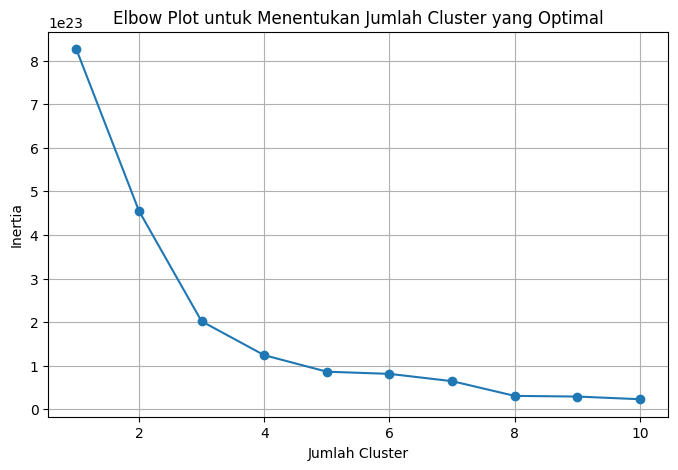

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
# Menambahkan magic command untuk Jupyter Notebook
%matplotlib inline


# Pilih fitur yang relevan untuk klastering
X = data[['bedRooms', 'price', 'buildingSize', 'landSize', 'bathRooms', 'garages']].values

# Menentukan rentang jumlah cluster yang akan diuji
range_n_clusters = list(range(1, 11))

# Menjalankan K-Means untuk setiap jumlah cluster dan menyimpan inertia
inertia = []
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Membuat elbow plot
plt.figure(figsize=(8, 5))
plt.plot(range_n_clusters, inertia, marker='o')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Inertia')
plt.title('Elbow Plot untuk Menentukan Jumlah Cluster yang Optimal')
plt.grid(True)
plt.show()

### CLUSTERING WITH K-MEANS

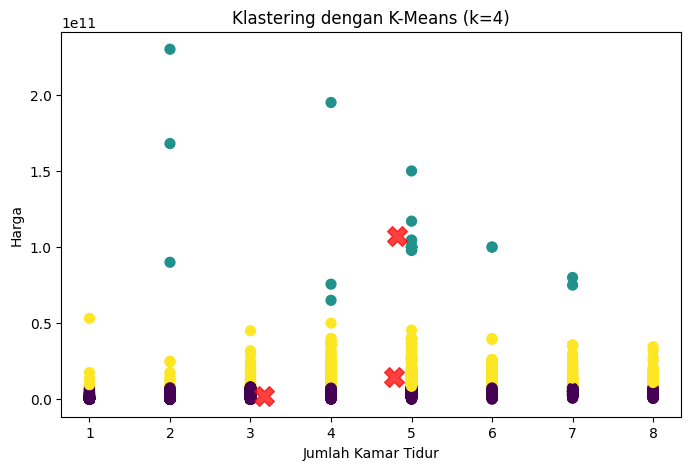

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Menjalankan K-Means dengan jumlah cluster = 3
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Mendapatkan label cluster untuk setiap data point
labels = kmeans.labels_

# Mendapatkan koordinat pusat cluster
centroids = kmeans.cluster_centers_

# Visualisasi hasil klastering
plt.figure(figsize=(8, 5))
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.xlabel('Jumlah Kamar Tidur')
plt.ylabel('Harga')
plt.title('Klastering dengan K-Means (k=3)')
plt.show()


### CLUSTERING WITH HIERARCHICAL (COMPLETE LINKAGE)

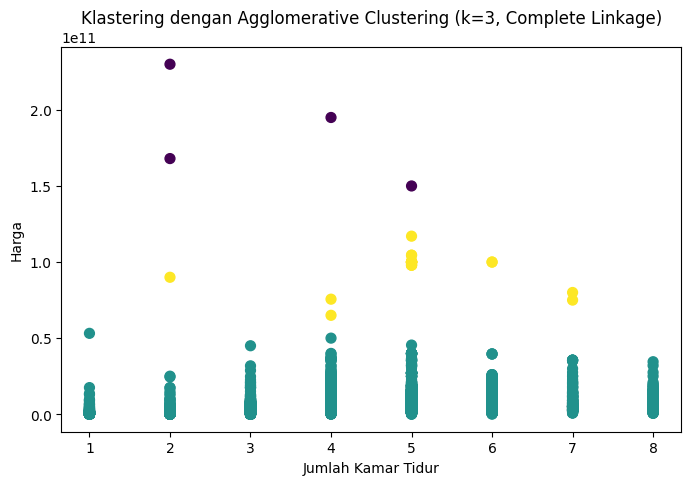

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

# Pilih fitur yang relevan untuk klastering
# Pastikan variabel data sudah didefinisikan sebelumnya
X = data[['bedRooms', 'price', 'buildingSize', 'landSize', 'bathRooms', 'garages']].values

# Menjalankan Agglomerative Clustering dengan jumlah cluster = 3 dan complete linkage
agglomerative = AgglomerativeClustering(n_clusters=3, linkage='complete')
labels = agglomerative.fit_predict(X)

# Visualisasi hasil klastering
plt.figure(figsize=(8, 5))
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.xlabel('Jumlah Kamar Tidur')
plt.ylabel('Harga')
plt.title('Klastering dengan Agglomerative Clustering (k=3, Complete Linkage)')
plt.show()

### ambil data dengan cluster terendah untuk forecasting

In [26]:
# Mendapatkan label cluster untuk setiap data point
data['cluster'] = labels

# Menghitung rata-rata harga untuk setiap cluster
cluster_avg_price = data.groupby('cluster')['price'].mean()

# Menemukan cluster dengan harga rata-rata terendah
lowest_price_cluster = cluster_avg_price.idxmin()

# Mengambil data dari cluster dengan harga terendah
lowest_price_cluster_data = data[data['cluster'] == lowest_price_cluster]

print("Cluster dengan harga rata-rata terendah:")
print(lowest_price_cluster_data)

Cluster dengan harga rata-rata terendah:
              price  buildingSize  landSize  bedRooms  bathRooms  garages  \
6        1300000000            70       102       2.0          1        0   
18       1500000000            60        64       2.0          2        0   
29        800000000           180       125       3.0          2        0   
35       1500000000           130        90       3.0          2        0   
45       2350000000            94        84       3.0          3        0   
...             ...           ...       ...       ...        ...      ...   
351798   1635000000            60       105       2.0          1        0   
351799  25000000000           968       708       7.0          5        4   
351800   1250000000            70        72       3.0          2        0   
351801  20000000000           700       600       7.0          7        0   
351802    650000000            55        60       3.0          2        1   

       province               city

C:\Users\ANITA\AppData\Local\Temp\ipykernel_4792\95737414.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cluster'] = labels


In [27]:
lowest_price_cluster_data.to_csv('data_properti_filtered.csv', index=False)